# __Data Analysis Interview Challenge__

### [Part 1 - Exploratory data analysis](#Part1)

### [Part 2 - Experiment and metrics design](#Part2)

### [Part 3 - Predictive modeling](#Part3)

# Part 1 - Exploratory data analysis <a id='Part1'></a>
* [1.1 Imports](#1.1)
* [1.2 Load data](#1.2)
* [1.3 Data wrangling](#1.3)
* [1.4 Explore the data](#1.4)
* [1.5 Summary](#1.5)

## 1.1 Imports<a id='1.1'></a>

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## 1.2 Load data<a id='1.2'></a>

In [2]:
logins = pd.read_json('data/logins.json')

## 1.3 Data wrangling<a id='1.3'></a>

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# Check if missing value exists
logins.isnull().sum()

login_time    0
dtype: int64

In [6]:
# Select login_time column
logintime = logins.login_time.tolist()

# Sorting
logintime.sort()

## 1.4 Explore the data<a id='1.4'></a>

### 1.4.1 Time series of login accounts<a id='1.4.1'></a>

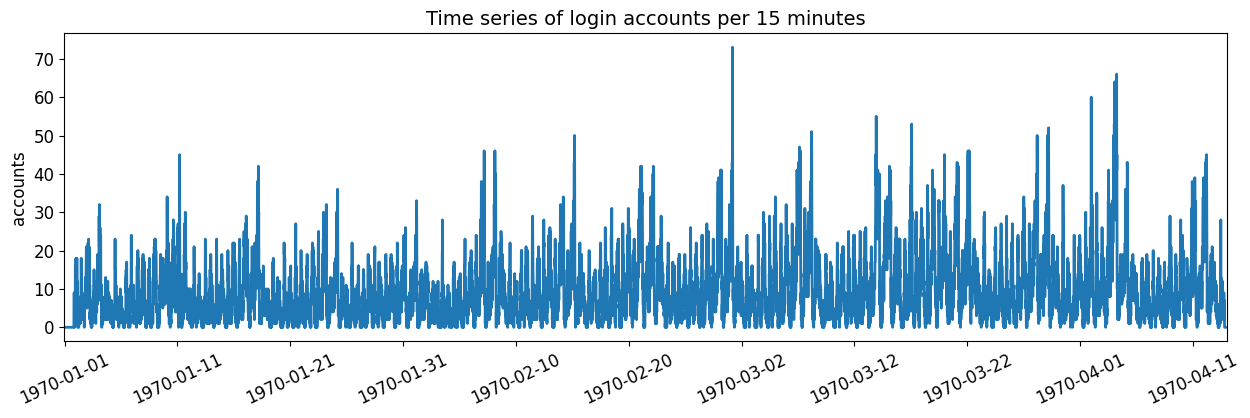

In [7]:
firstday = logintime[0].date()
lastday = logintime[-1].date() + timedelta(days=1)
nday = (lastday-firstday).days     # Total length (days) of the dataset

segment = 15  # mins
nseg_day = int(24*60/segment)

nseg_hist = nseg_day * nday

starttime = datetime(firstday.year,firstday.month,firstday.day)
accounts_hist = np.zeros(nseg_hist)
time_hist = []
logintime_array = np.array(logintime)
for i in range(nseg_hist):
    start, end = starttime+timedelta(minutes=segment*i), starttime+timedelta(minutes=segment*(i+1))
    accounts_hist[i] = ( (logintime_array>=start) * (logintime_array<end) ).sum()
    # accounts_hist[i] = np.array([(d>=start and d<end) for d in logintime]).sum()
    time_hist.append(start.strftime('%Y-%m-%d'))
    # if np.mod(i,nseg_day*10) == 0:
    #     print('day:',int(i/nseg_day)+1)
        
fig = plt.figure(figsize=(15,4))
ax = plt.axes()
ax.set_ylabel('accounts',fontsize=12)
ax.set_xlim(-1,nseg_hist)
xtick_ind = np.arange(0,nseg_hist,nseg_day*10)
xtick_label = time_hist[0:nseg_hist:nseg_day*10]
ax.set_xticks(xtick_ind)
ax.set_xticklabels(xtick_label)
ax.tick_params(axis='both', labelsize=12)
ax.plot(np.arange(0,nseg_hist),accounts_hist,linewidth=2)
ax.tick_params(axis='x',rotation=25)
ax.set_title('Time series of login accounts per 15 minutes',fontsize=14)
plt.show()

### 1.4.2 Daily cycle of login accounts<a id='1.4.2'></a>

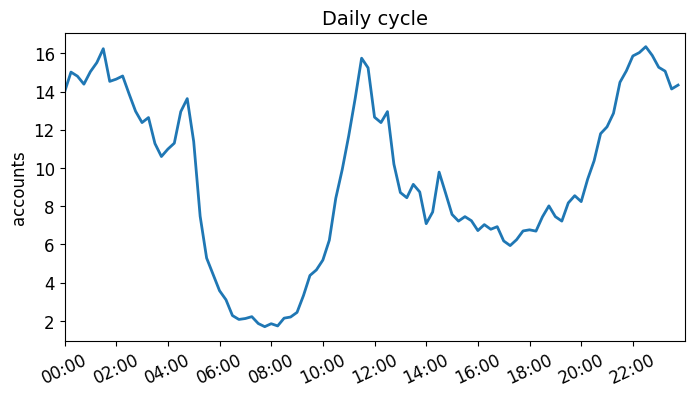

In [8]:
firstday = logintime[0].date()
lastday = logintime[-1].date() + timedelta(days=1)
nday = (lastday-firstday).days     # Total length (days) of the dataset

segment = 15  # minutes per segment
nseg_hour = int(60/segment)
nseg_day = int(24*60/segment)

logintime_HMS = [rec.strftime('%H-%M-%S') for rec in logintime]
accounts_DailyCycle = np.zeros(nseg_day)
time_DailyCycle = []

for i in range(nseg_day):
    start, end = datetime.strptime('00-00-00','%H-%M-%S')+timedelta(minutes=segment*i), datetime.strptime('00-00-00','%H-%M-%S')+timedelta(minutes=segment*(i+1))
    start_str, end_str = start.strftime('%H-%M-%S'), end.strftime('%H-%M-%S')
    if end_str == '00-00-00':
        end_str = '24-00-00'
    accounts_DailyCycle[i] = np.array([(d>=start_str and d<end_str) for d in logintime_HMS]).sum() / nday
    time_DailyCycle.append(start.strftime('%H:%M'))

    
fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.set_ylabel('accounts',fontsize=12)
ax.set_xlim(0,nseg_day)
xtick_ind = np.arange(0,nseg_day,nseg_hour*2)
xtick_label = time_DailyCycle[0:nseg_day:nseg_hour*2]
ax.set_xticks(xtick_ind)
ax.set_xticklabels(xtick_label)
ax.tick_params(axis='both', labelsize=12)
# ax.bar(np.arange(0,nseg_day),accounts_DailyCycle, width=0.5)
ax.plot(np.arange(0,nseg_day),accounts_DailyCycle, linewidth=2)
ax.tick_params(axis='x',rotation=25)
ax.set_title('Daily cycle',fontsize=14)
plt.show()

### 1.4.3 Time series of daily login accounts<a id='1.4.3'></a>

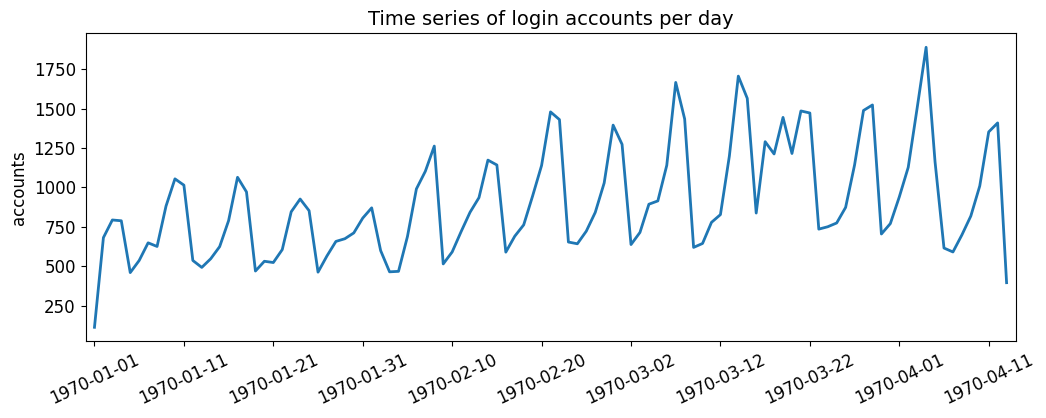

In [9]:
logintime_HMS = [rec.strftime('%H-%M-%S') for rec in logintime]
accounts_daily = np.zeros(nday)
time_daily = []

for i in range(nday):
    start, end = firstday+timedelta(days=i), firstday+timedelta(days=i+1)
    accounts_daily[i] = np.array([(d>=start and d<end) for d in logintime]).sum()
    time_daily.append(start.strftime('%Y-%m-%d'))
accounts_daily = np.array(accounts_daily)


fig = plt.figure(figsize=(12,4))
ax = plt.axes()
ax.set_ylabel('accounts',fontsize=12)
ax.set_xlim(-1,nday)
xtick_ind = np.arange(0,nday,10)
xtick_label = time_daily[0:nday:10]
ax.set_xticks(xtick_ind)
ax.set_xticklabels(xtick_label)
ax.tick_params(axis='both', labelsize=12)
ax.plot(np.arange(0,nday),accounts_daily,linewidth=2)
ax.tick_params(axis='x',rotation=25)
ax.set_title('Time series of login accounts per day',fontsize=14)
plt.show()

### 1.4.4 Weekly cycle<a id='1.4.4'></a>

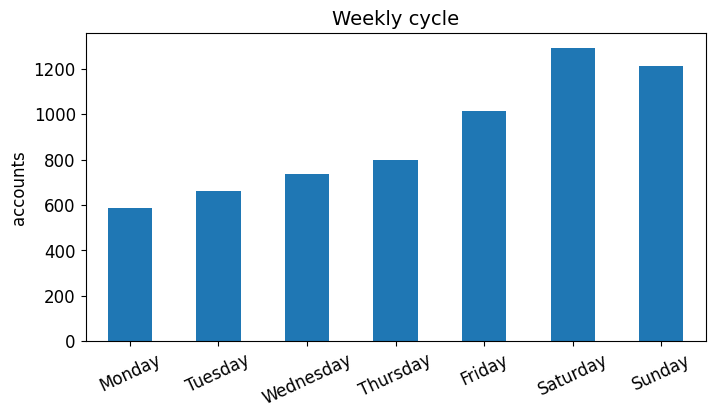

In [10]:
accounts_WeeklyCycle = []
nweekday = []

# Determines how many weeks during the whole period per weekday
dates = []
for i in range(nday):
    dates.append(firstday + i*timedelta(days=1))
for i in range(7):
    nweekday.append( np.array([d.weekday()==i for d in dates]).sum() ) 
    
# Identify number of login accounts per weekday
for i in range(7):
    accounts_WeeklyCycle.append( np.array([d.weekday()==i for d in logintime]).sum() )
accounts_WeeklyCycle = np.array(accounts_WeeklyCycle) / np.array(nweekday)

fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.set_ylabel('accounts',fontsize=12)
ax.set_xlim(0.5,7.5)
xtick_ind = np.arange(1,8)
xtick_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(xtick_ind)
ax.set_xticklabels(xtick_label)
ax.tick_params(axis='both', labelsize=12)
ax.bar(np.arange(1,8),accounts_WeeklyCycle, width=0.5)
ax.tick_params(axis='x',rotation=25)
ax.set_title('Weekly cycle',fontsize=14)
plt.show()

### 1.4.5 Time series of weekly login accounts<a id='1.4.5'></a>

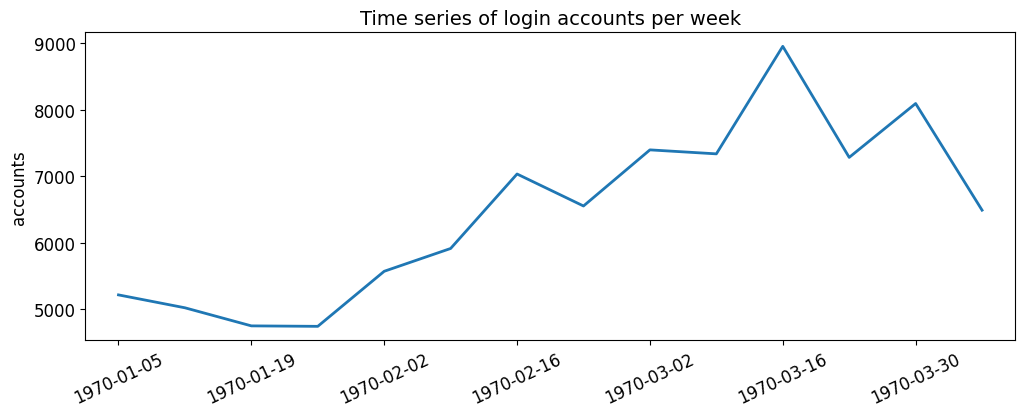

In [11]:
nweek = lastday.isocalendar()[1] - firstday.isocalendar()[1] + 1

accounts_weekly = np.zeros(nweek)
time_weekly = []
Monday_firstweek = firstday - timedelta(firstday.isocalendar()[2]-1)
for i in range(nweek):
    Monday_thisweek = Monday_firstweek + timedelta(days=7)*i
    time_weekly.append(Monday_thisweek.strftime('%Y-%m-%d'))

for i in range(nday):
    thisday = firstday+timedelta(days=i)
    thisyear = thisday.isocalendar()[0]
    thisweek = thisday.isocalendar()[1] 
    accounts_weekly[thisweek-firstday.isocalendar()[1]] = np.array([(d.isocalendar()[0]==thisyear and d.isocalendar()[1]==thisweek) for d in logintime]).sum()
    
    
fig = plt.figure(figsize=(12,4))
ax = plt.axes()
ax.set_ylabel('accounts',fontsize=12)
ax.set_xlim(0.5,nweek-1.5)
xtick_ind = np.arange(1,nweek-1,2)
xtick_label = time_weekly[1:nweek-1:2]
ax.set_xticks(xtick_ind)
ax.set_xticklabels(xtick_label)
ax.tick_params(axis='both', labelsize=12)
ax.plot(np.arange(1,nweek-1),accounts_weekly[1:-1],linewidth=2)
ax.tick_params(axis='x',rotation=25)
ax.set_title('Time series of login accounts per week',fontsize=14)
plt.show()

## 1.5 Summary<a id='1.5'></a>
#### The number of login accounts exhibit following patterns:
- It has a daily cycle, with two peaks at around 12:00 and 22:00 and two valleys at around 08:00 and 17:00.
- It has a weekly cycle, with maximum login accounts at the weekend. Monday sees the fewst login accounts.
- It shows a trend. Within the period of the data, (i.e., January to April of 1970), the number of login accounts generray increases from January to March and then saturates.

# Part 2 - Experiment and metrics design <a id='Part2'></a>

**Problem 1**: *What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?* 

**Answer**: The measure of success will be defined as **the ratio between the driver partners that are more willing to serve both cities and the total driver partners**. 
This metric can unambiguously indicate the success or failure of the experiment. To be more specific, an increase or no change of the ratio after performing the experiment suggests that the experiment is working or not working, respectively. The larger the increment is, the more success the experiment has. 

**Problem 2**: *Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:*

*a). how you will implement the experiment?* 

**Answer**: \
**Step 1**: All the driver partners are randomly divided into two groups, i.e., the control group and the experiment group. For each group, the number of driver partners from each of the two cities is proportional to the total driver parteners in that city. The control group comprises the remaining 80% of all the driver partners. For significance test, the control group is further divided into four sub-groups, with each sub-group comprising 20% of all the driver partners.\
**Step 2**: The experiments will last 6 months. All the driver partners in the control group are not reimbursed for the toll costs during the 6-month period. However, the driver partners in the experiment group get reimbursed during the latter 3 months.\
**Step 3**: How many times each selected driver partner travel across the toll during the first and latter 3 months will be seperately counted. A driver partner will be tagged as being more willing to serve both cities if the number he/she travels across the toll during the latter 3 months is 20% higher than during the first 3 months.\
**Step 4**: For each group (the experiment group and the four control sub-groups), the ratio between the number of driver partners that tagged as being more willing to serve both cities and the number of total driver partners in that group is calculated seperately. A positive ratio for the experiment group indicates that the experiment might be successful. However, the significance of this finding should be tested as answered in the next question.

*b). what statistical test(s) you will conduct to verify the significance of the observation?*

**Answer**: The ratio (i.e., as described in Step 4 in the above answer) is compared between the experiment group and the control sub-groups. More specifically, the average and the standard deviation of the ratio in the four control sub-groups are calculated. Then if ratio in the experiment group is larger than the averaged ratio in the four control sub-groups by more than one standard deviation of the ratio in the four control sub-groups, one can rule out the hypothesis that the increase of the ratio of driver parterners that are more willing to service both cities is significantly increased after getting reimbursed is by chance rather than being significant.

*c). how you would interpret the results and provide recommendations to the city operations team along with any caveats?*

**Answer**: If the above significance test supports the finding that the above ratio increase is significant, it can be argued that driver partners getting reimbursed for the toll costs may indeed be more willing to serve both cities. However, it should be noted that the fincancial costs for the city operations increase with more reimbursement they provide. Therefore, the manager of city operators shall seek consultation on if the increased willingness to serve both cities are worthy for the increased costs. They may identify what is the minimum ratio increment that is need to offset the operation costs.

# Part 3 - Predictive modeling <a id='Part3'></a>
## Contents
* [3.1 Imports](#3.1)
* [3.2 Load data](#3.2)
* [3.3 Data wrangling](#3.3)
* [3.4 Explore the data](#3.4)
* [3.5 Predictive modeling](#3.5)
* [3.6 Summary](#3.6)

## 3.1 Imports<a id='3.1'></a>

In [12]:
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## 3.2 Load data<a id='3.2'></a>

In [13]:
rider = pd.read_json('data/ultimate_data_challenge.json')

## 3.3 Data Wrangling<a id='3.3'></a>

In [14]:
rider.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [15]:
rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [16]:
rider.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

## 3.4 Explore the data<a id='3.4'></a>

### 3.4.1 Identify retained riders<a id='3.4.1'></a>

We assume the latest date of the "last_trip_date" as the date when the data was pulled. 

In [17]:
LastTripDate = pd.to_datetime(rider.last_trip_date)
DatasetDate = LastTripDate.max()
DatasetDate

Timestamp('2014-07-01 00:00:00')

2014-07-01 is the date when the data was pulled. Then an user whose last trip is after 2014-06-01 is tagged as "acitive" and defined as a retained user.

In [18]:
rider['retention'] = LastTripDate >= (DatasetDate-timedelta(days=30))
rider['retained'] = LastTripDate >= (DatasetDate-timedelta(days=30))
rider.loc[rider['retention'], 'retention'] = 'retained'
rider.loc[rider['retention']==False, 'retention'] = 'NOT retained'

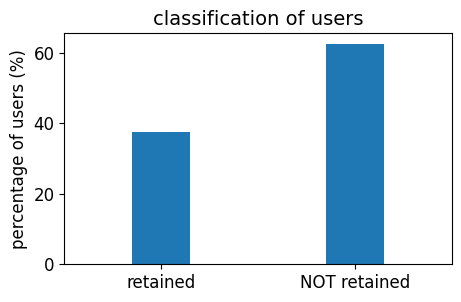

In [19]:
count_retained = sum(rider.retention=='retained')
count_nonretained = sum(rider.retention=='NOT retained')
percentage_retained = count_retained / rider.shape[0] * 100
percentage_nonretained = count_nonretained / rider.shape[0] * 100

fig = plt.figure(figsize=(5,3))
ax = plt.axes()
ax.set_xlim(0.5,2.5)
ax.set_xticks([1,2])
ax.set_xticklabels(['retained', 'NOT retained'])
ax.tick_params(axis='both', labelsize=12)
ax.bar(np.arange(1,3),[percentage_retained, percentage_nonretained], width=0.3)
# ax.tick_params(axis='x',rotation=25)
ax.set_ylabel('percentage of users (%)',fontsize=12)
ax.set_title('classification of users',fontsize=14)
plt.show()

**Finding**: 37.6% of the 50000 users are retained riders.

### 3.4.2 Identify factors relevant to rider retention<a id='3.4.2'></a>

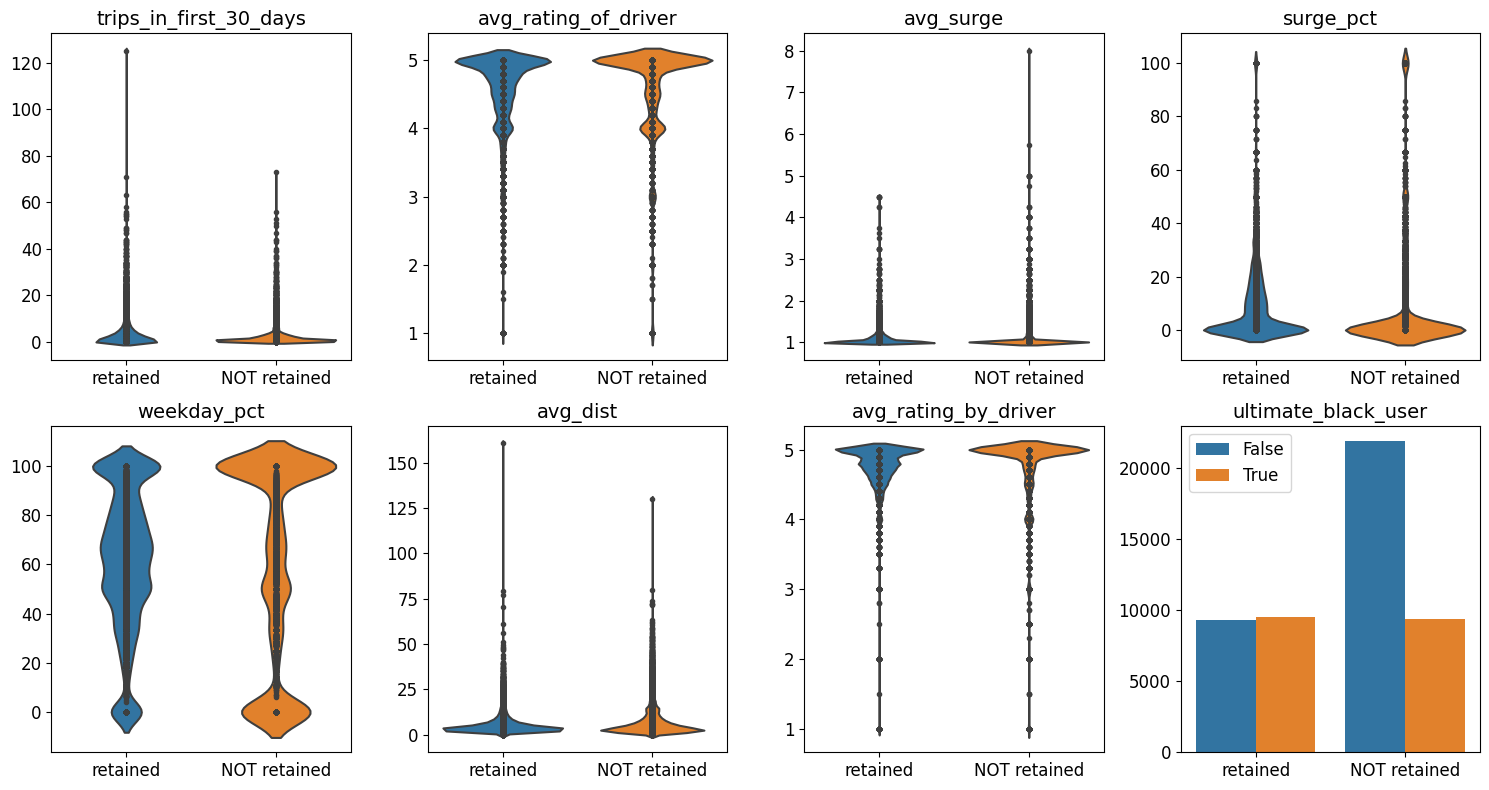

In [20]:
factors = ['trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver','ultimate_black_user']

fig,ax = plt.subplots(2,4,figsize=(15,8))
ax_cols = ax.flatten()
# plt.subplots_adjust(top = 1., bottom=0., hspace=0.3, wspace=0.2)
for i in range(len(ax_cols)):
    if i!=7:
        sns.violinplot(data=rider, x="retention", y=factors[i], inner="point", ax=ax_cols[i])
    else:
        sns.countplot(x="retention", hue="ultimate_black_user", data=rider, ax=ax_cols[7])
    ax_cols[i].set_xlabel('')
    ax_cols[i].set_ylabel('')
    ax_cols[i].set_title(factors[i], fontsize=14)
    ax_cols[i].tick_params(axis='both', labelsize=12)
    
    ax_cols[7].legend(['False','True'],fontsize=12,loc='upper left')

fig.tight_layout()

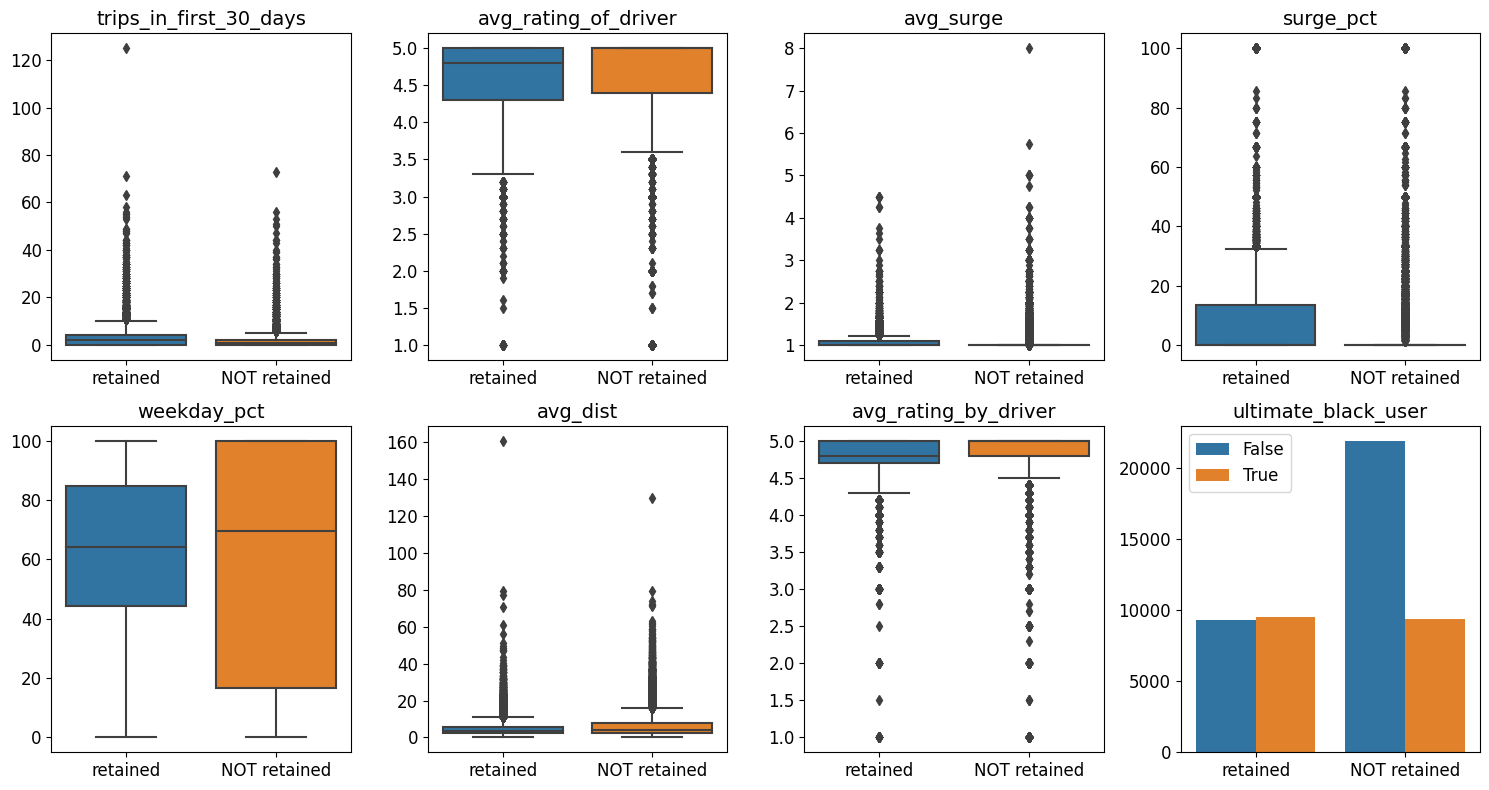

In [21]:
fig,ax = plt.subplots(2,4,figsize=(15,8))
ax_cols = ax.flatten()
for i in range(len(ax_cols)):
    if i!=7:
        sns.boxplot(data=rider, x="retention", y=factors[i], ax=ax_cols[i])
    else:
        sns.countplot(x="retention", hue="ultimate_black_user", data=rider, ax=ax_cols[7])
    ax_cols[i].set_xlabel('')
    ax_cols[i].set_ylabel('')
    ax_cols[i].set_title(factors[i], fontsize=14)
    ax_cols[i].tick_params(axis='both', labelsize=12)
    
    ax_cols[7].legend(['False','True'],fontsize=12,loc='upper left')

fig.tight_layout()

**Finding**:
- Retained riders tend to have more trips in the first 30 days after signup, longer average distance per trip taken in the first 30 days after signup, and higher percent of trips taken with surge multiplier>1 than riders not retained.
- Riders took an Ultimate Black in their first 30 days are more likely to be retained.
- The percent of the user's trips occuring during the workday may be relevant to rider retention. But interpretation of this factor is not straightforward. For the non-retained riders, they tend to take all of their trips either during the weekdays or at the weekend.
- Overall, 'surge_pct' and 'ultimate_black_user' are the main factors that are distinct between the retained and nonretained riders.
- Contribution from the other factors to rider retention is less evident.

## 3.5 Predictive modeling<a id='3.5'></a>

We use the **logistic regression model** to perform prediction.

Distinct combinations of factors are seletec to be the model predictors in a hierarchical setting.
<br><&emsp>Considering that the "avg_rating_of_driver", which may not have significant impact on rider retention, has a large amount of missing value, we simply do not consider this factor in the predictive model.Considering that the "avg_rating_of_driver", which may not have significant impact on rider retention, has a large amount of missing value, we simply do not consider this factor in the model.
<br>The benchmark model comprises only two predictors, namely "surge_pct" and "ultimate_black_user". These two factors are found to be relevant to rider retention according to EDA in section 3.4.
<br>The remaining factors are added to the bechmark model one by one to test their individual contribution to the prediction skill.
<br>The last model comprises all the seven factors as model predictors.
*a)*. In the first setting, we use all the factors discussed in section 3.4. 
<br>*b)*. In the second setting, we only use the four factors that found to be relevant to rider retention, namely "trips_in_first_30_days", "avg_dist", "surge_pct", and "ultimate_black_user".

The train and test data are split by 80% *vs* 20%. The performance of the predictive model is measured by the accuracy score using the test data.

### 3.5.1 Processing of training and testing data

In [22]:
# Clean dataset by removing rows containing missing values
rider_rmvnull = rider[['trips_in_first_30_days','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver','ultimate_black_user','retained']].dropna(axis=0)

# Select predictors and predictand
X_all = rider_rmvnull[['trips_in_first_30_days','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver','ultimate_black_user']].values
Y = rider_rmvnull['retained'].values

# Encode
le = LabelEncoder()
X_all[:,6] = le.fit_transform(X_all[:,6])
Y = le.fit_transform(Y)

# Feature scaling
sc = StandardScaler()
X_all[:,0:6] = sc.fit_transform(X_all[:,0:6])

### 3.5.2 Benchmark model with 2 predictors

In [23]:
X = X_all[:,[2,6]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42, stratify=Y)

logisticRegr = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
logisticRegr.fit(X_train, Y_train)

AccuracyTrain_benchmark = accuracy_score(logisticRegr.predict(X_train), Y_train)
AccuracyTest_benchmark = accuracy_score(logisticRegr.predict(X_test), Y_test)

### 3.5.3 Conbribution from remaining three factors

In [24]:
X = X_all[:,[0,2,6]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.10, random_state = 0)
logisticRegr = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
logisticRegr.fit(X_train, Y_train)
AccuracyTrain_trips_in_first_30_days = accuracy_score(logisticRegr.predict(X_train), Y_train)
AccuracyTest_trips_in_first_30_days = accuracy_score(logisticRegr.predict(X_test), Y_test)

X = X_all[:,[1,2,6]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, random_state = 0)
logisticRegr = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
logisticRegr.fit(X_train, Y_train)
AccuracyTrain_avg_surge = accuracy_score(logisticRegr.predict(X_train), Y_train)
AccuracyTest_avg_surge = accuracy_score(logisticRegr.predict(X_test), Y_test)

X = X_all[:,[2,3,6]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, random_state = 0)
logisticRegr = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
logisticRegr.fit(X_train, Y_train)
AccuracyTrain_weekday_pct = accuracy_score(logisticRegr.predict(X_train), Y_train)
AccuracyTest_weekday_pct = accuracy_score(logisticRegr.predict(X_test), Y_test)

X = X_all[:,[2,4,6]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, random_state = 0)
logisticRegr = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
logisticRegr.fit(X_train, Y_train)
AccuracyTrain_avg_dist = accuracy_score(logisticRegr.predict(X_train), Y_train)
AccuracyTest_avg_dist = accuracy_score(logisticRegr.predict(X_test), Y_test)

X = X_all[:,[2,5,6]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, random_state = 0)
logisticRegr = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
logisticRegr.fit(X_train, Y_train)
AccuracyTrain_avg_rating_by_driver = accuracy_score(logisticRegr.predict(X_train), Y_train)
AccuracyTest_avg_rating_by_driver = accuracy_score(logisticRegr.predict(X_test), Y_test)

### 3.5.4 Full model with 7 predictors

In [25]:
X = X_all
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, random_state = 0)
logisticRegr = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
logisticRegr.fit(X_train, Y_train)
AccuracyTrain_ALL = accuracy_score(logisticRegr.predict(X_train), Y_train)
AccuracyTest_ALL = accuracy_score(logisticRegr.predict(X_test), Y_test)

### 3.5.5 Evaluate model performance with different settings

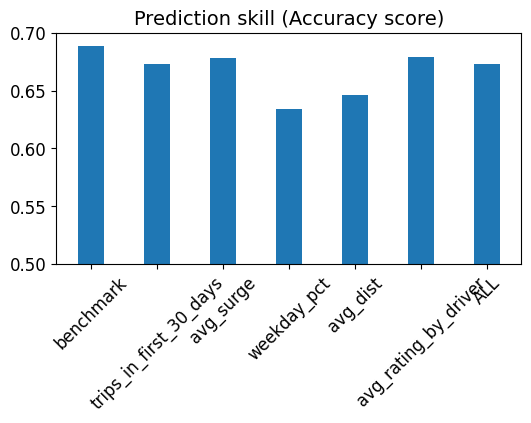

In [26]:
labels = ['benchmark', 'trips_in_first_30_days', 'avg_surge', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'ALL']
nfactor = len(labels)
AccuracyTrain = [AccuracyTrain_benchmark, AccuracyTrain_trips_in_first_30_days, AccuracyTrain_avg_surge, AccuracyTrain_weekday_pct, AccuracyTrain_avg_dist, AccuracyTrain_avg_rating_by_driver, AccuracyTrain_ALL]
AccuracyTest = [AccuracyTest_benchmark, AccuracyTest_trips_in_first_30_days, AccuracyTest_avg_surge, AccuracyTest_weekday_pct, AccuracyTest_avg_dist, AccuracyTest_avg_rating_by_driver, AccuracyTest_ALL]

fig = plt.figure(figsize=(6,3))
ax = plt.axes()
ax.bar(np.arange(1,2*nfactor,2),AccuracyTest)
ax.set_ylim(0.5,0.7)
ax.set_xticks(np.arange(1,2*nfactor,2))
ax.set_xticklabels(labels)
ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x',rotation=45)
ax.set_title('Prediction skill (Accuracy score)',fontsize=14)
plt.show()

**Finding**: \
The accuracy score, which measures the prediction skill is about 0.67. This means that 67% of the riders are classified correctly. \
Addition of predictors do not improve prediction skill compared with the benchmark model.

## 3.6 Summary<a id='3.6'></a>

* A logistic regression model can be used to predict the ride retention with an accuracy of about 67%.
* Percent of trips taken with surge multiplier>1 and whether taking an Ultimate Black in the first 30 days are the two main factors determining ride retention. Adding other factors does not improve the prediction skill.
* Other prediction model, such as the artificial neural network, is needed to examine if one can achieve higher prediction skill.